In [1]:
import pandas as pd
import numpy as np
import os
import re
import requests
import matplotlib.pyplot as plt
from polymarket_events import Polymarket_events

In [2]:
path_to_args = 'private_kargs.json'

In [3]:
money_maker = Polymarket_events(path_to_args=path_to_args, league='NBA')

Succesfully auth with Poly
Remaining requests 449
Used requests 51
Market.update_market() PolyApiException[status_code=404, error_message={'error': 'No orderbook exists for the requested token id'}] question: Pelicans vs. Hawks
Market.update_market() PolyApiException[status_code=404, error_message={'error': 'No orderbook exists for the requested token id'}] question: Wizards vs. Cavaliers
Market.update_market() PolyApiException[status_code=404, error_message={'error': 'No orderbook exists for the requested token id'}] question: Bucks vs. Pistons
Market.update_market() PolyApiException[status_code=404, error_message={'error': 'No orderbook exists for the requested token id'}] question: Magic vs. Knicks
Market.update_market() PolyApiException[status_code=404, error_message={'error': 'No orderbook exists for the requested token id'}] question: Lakers vs. Timberwolves
Market.update_market() PolyApiException[status_code=404, error_message={'error': 'No orderbook exists for the requested tok

In [8]:
money_maker.agg_markets_to_df()
signal = money_maker.run_signal()
DEP = 120
signal['kelly'] = signal['kelly'] * DEP

In [9]:
signal


best_bid  \
question                  commence_time outcome                            
Hawks vs. Bucks           2024-12-05    Atlanta Hawks               0.37   
                                        Milwaukee Bucks             0.62   
Lakers vs. Heat           2024-12-05    Los Angeles Lakers          0.45   
                                        Miami Heat                  0.52   
Magic vs. 76ers           2024-12-05    Orlando Magic               0.59   
                                        Philadelphia 76ers          0.40   
Pacers vs. Nets           2024-12-05    Indiana Pacers              0.55   
                                        Brooklyn Nets               0.43   
Pistons vs. Celtics       2024-12-05    Detroit Pistons             0.10   
                                        Boston Celtics              0.89   
Timberwolves vs. Clippers 2024-12-05    Minnesota Timberwolves      0.55   
                                        Los Angeles Clippers        0.44   

                                                                best_ask  \
question                  commence_time outcome                            
Hawks vs. Bucks           2024-12-05    Atlanta Hawks               0.38   
                                        Milwaukee Bucks             0.63   
Lakers vs. Heat           2024-12-05    Los Angeles Lakers          0.48   
                                        Miami Heat                  0.55   
Magic vs. 76ers           2024-12-05    Orlando Magic               0.60   
                                        Philadelphia 76ers          0.41   
Pacers vs. Nets           2024-12-05    Indiana Pacers              0.57   
                                        Brooklyn Nets               0.45   
Pistons vs. Celtics       2024-12-05    Detroit Pistons             0.11   
                                        Boston Celtics              0.90   
Timberwolves vs. Clippers 2024-12-05    Minnesota Timberwolves      0.56   
                                        Los Angeles Clippers        0.45   

                                                                    mean  \
question                  commence_time outcome                            
Hawks vs. Bucks           2024-12-05    Atlanta Hawks           0.380980   
                                        Milwaukee Bucks         0.619020   
Lakers vs. Heat           2024-12-05    Los Angeles Lakers      0.461894   
                                        Miami Heat              0.538106   
Magic vs. 76ers           2024-12-05    Orlando Magic           0.582316   
                                        Philadelphia 76ers      0.417684   
Pacers vs. Nets           2024-12-05    Indiana Pacers          0.546678   
                                        Brooklyn Nets           0.453322   
Pistons vs. Celtics       2024-12-05    Detroit Pistons         0.120730   
                                        Boston Celtics          0.879270   
Timberwolves vs. Clippers 2024-12-05    Minnesota Timberwolves  0.565184   
                                        Los Angeles Clippers    0.434816   

                                                                     min  \
question                  commence_time outcome                            
Hawks vs. Bucks           2024-12-05    Atlanta Hawks           0.371981   
                                        Milwaukee Bucks         0.612346   
Lakers vs. Heat           2024-12-05    Los Angeles Lakers      0.457364   
                                        Miami Heat              0.532468   
Magic vs. 76ers           2024-12-05    Orlando Magic           0.576923   
                                        Philadelphia 76ers      0.408060   
Pacers vs. Nets           2024-12-05    Indiana Pacers          0.542636   
                                        Brooklyn Nets           0.447301   
Pistons vs. Celtics       2024-12-05    Detroit Pistons         0.112735   
                                 

In [39]:
map_table = money_maker.database.map_table
replacement_dict = map_table.to_dict()
# replacement_dict

{'bet_api_team_name': {'76ers': 'Philadelphia 76ers',
  'Bucks': 'Milwaukee Bucks',
  'Cavaliers': 'Cleveland Cavaliers',
  'Celtics': 'Boston Celtics',
  'Clippers': 'Los Angeles Clippers',
  'Grizzlies': 'Memphis Grizzlies',
  'Hornets': 'Charlotte Hornets',
  'Jazz': 'Utah Jazz',
  'Kings': 'Sacramento Kings',
  'Knicks': 'New York Knicks',
  'Lakers': 'Los Angeles Lakers',
  'Magic': 'Orlando Magic',
  'Mavericks': 'Dallas Mavericks',
  'Nuggets': 'Denver Nuggets',
  'Pacers': 'Indiana Pacers',
  'Pistons': 'Detroit Pistons',
  'Raptors': 'Toronto Raptors',
  'Rockets': 'Houston Rockets',
  'Spurs': 'San Antonio Spurs',
  'Suns': 'Phoenix Suns',
  'Thunder': 'Oklahoma City Thunder',
  'Timberwolves': 'Minnesota Timberwolves',
  'Trail Blazers': 'Portland Trail Blazers',
  'Warriors': 'Golden State Warriors',
  'Wizards': 'Washington Wizards',
  'Nets': 'Brooklyn Nets',
  'Pelicans': '-',
  'Heat': 'Miami Heat',
  'Hawks': 'Atlanta Hawks',
  'Bulls': '-'}}

In [45]:
poly_prices['team'] = poly_prices['team'].replace(replacement_dict['bet_api_team_name'])
poly_prices.rename(columns={'team': 'outcome'}, inplace=True)
poly_prices

,question,commence_time,outcome,best_bid,best_ask
0,Kings vs. Spurs,2024-12-07,Sacramento Kings,0.30,0.40
1,Kings vs. Spurs,2024-12-07,San Antonio Spurs,0.60,0.70
2,Lakers vs. Hawks,2024-12-07,Los Angeles Lakers,0.30,0.66
3,Lakers vs. Hawks,2024-12-07,Atlanta Hawks,0.34,0.70
4,Pistons vs. Knicks,2024-12-08,Detroit Pistons,0.30,0.40
5,Pistons vs. Knicks,2024-12-08,New York Knicks,0.60,0.70
6,Rockets vs. Warriors,2024-12-06,Houston Rockets,0.39,0.65
7,Rockets vs. Warriors,2024-12-06,Golden State Warriors,0.35,0.61
8,Pistons vs. Celtics,2024-12-05,Detroit Pistons,0.10,0.11
9,Pistons vs. Celtics,2024-12-05,Boston Celtics,0.89,0.90


best_bid  \
question                  commence_time outcome                            
Hawks vs. Bucks           2024-12-05    Atlanta Hawks               0.36   
                                        Milwaukee Bucks             0.62   
Lakers vs. Heat           2024-12-05    Miami Heat                  0.53   
                                        Los Angeles Lakers          0.45   
Magic vs. 76ers           2024-12-05    Philadelphia 76ers          0.40   
                                        Orlando Magic               0.59   
Pacers vs. Nets           2024-12-05    Indiana Pacers              0.55   
                                        Brooklyn Nets               0.43   
Pistons vs. Celtics       2024-12-05    Detroit Pistons             0.10   
                                        Boston Celtics              0.89   
Timberwolves vs. Clippers 2024-12-05    Los Angeles Clippers        0.43   
                                        Minnesota Timberwolves      0.56   
Bulls vs. Spurs           2024-12-06    -                           0.21   
                                        San Antonio Spurs           0.73   
Hornets vs. Knicks        2024-12-06    Charlotte Hornets           0.11   
                                        New York Knicks             0.72   
Kings vs. Grizzlies       2024-12-06    Memphis Grizzlies           0.61   
                                        Sacramento Kings            0.27   
Mavericks vs. Wizards     2024-12-06    Washington Wizards          0.07   
                                        Dallas Mavericks            0.87   
Nuggets vs. Cavaliers     2024-12-06    Denver Nuggets              0.16   
                                        Cleveland Cavaliers         0.75   
Rockets vs. Warriors      2024-12-06    Golden State Warriors       0.35   
                                        Houston Rockets             0.39   
Suns vs. Pelicans         2024-12-06    Phoenix Suns                0.78   
                                        -                           0.10   
Thunder vs. Raptors       2024-12-06    Toronto Raptors             0.14   
                                        Oklahoma City Thunder       0.80   
Bucks vs. Celtics         2024-12-07    Boston Celtics              0.69   
                                        Milwaukee Bucks             0.24   
Cavaliers vs. Hornets     2024-12-07    Cleveland Cavaliers         0.78   
                                        Charlotte Hornets           0.12   
Jazz vs. Trail Blazers    2024-12-07    Utah Jazz                   0.18   
                                        Portland Trail Blazers      0.61   
Kings vs. Spurs           2024-12-07    San Antonio Spurs           0.60   
                                        Sacramento Kings            0.30   
Lakers vs. Hawks          2024-12-07    Los Angeles Lakers          0.30   
                                        Atlanta Hawks               0.34   
Magic vs. 76ers           2024-12-07    Philadelphia 76ers          0.38   
                                        Orlando Magic               0.57   
Pacers vs. Bulls          2024-12-07    -                           0.41   
                                        Indiana Pacers              0.49   
Timberwolves vs. Warriors 2024-12-07    Minnesota Timberwolves      0.39   
                                        Golden State Warriors       0.39   
Grizzlies vs. Celtics     2024-12-08    Memphis Grizzlies           0.29   
                                        Boston Celtics              0.56   
Mavericks vs. Raptors     2024-12-08    Dallas Mavericks            0.69   
                                        Toronto Raptors             0.17   
Nuggets vs. Wizards       2024-12-08    Denver Nuggets              0.82   
                                        Washington Wizards          0.10   
Pistons vs. Knicks        2024-12-08    Detroit Pistons             0.30   
                                    

In [2]:
from betting_api_connector_events import Bet_API

In [4]:
bet_api_connector = Bet_API(path_to_args=path_to_args, league="NBA")

Remaining requests 458
Used requests 42


In [5]:
bet_api_connector.probs

mean  \
match_id                         commence_time             outcome                            
476416aa38d1c8fb8a9bfc5ae8fe6251 2024-12-04 00:10:00+00:00 Cleveland Cavaliers     0.897865   
                                                           Washington Wizards      0.102135   
51b9bfc3b65785071f6baf407abb4cbd 2024-12-04 00:10:00+00:00 Detroit Pistons         0.415149   
                                                           Milwaukee Bucks         0.584851   
a529d206e3ed0dfda3123b17eab6a162 2024-12-04 00:10:00+00:00 Charlotte Hornets       0.378859   
                                                           Philadelphia 76ers      0.621141   
823e03f1e150f589e94392112743e204 2024-12-04 00:30:00+00:00 New York Knicks         0.627454   
                                                           Orlando Magic           0.372546   
f53359e43a9975db8b93a561183faeb8 2024-12-04 00:40:00+00:00 Indiana Pacers          0.571466   
                                                           Toronto Raptors         0.428534   
09758dcdf7adb5fded5490f2191ba107 2024-12-04 01:10:00+00:00 Oklahoma City Thunder   0.868626   
                                                           Utah Jazz               0.131374   
6060ee0918c66681cee75352d305f91c 2024-12-04 01:40:00+00:00 Dallas Mavericks        0.605977   
                                                           Memphis Grizzlies       0.394023   
413cdfb55ea70d2f55ddc47233d14b99 2024-12-04 02:10:00+00:00 Phoenix Suns            0.715472   
                                                           San Antonio Spurs       0.284528   
eaf04a3044de875dc6c83132d04ae9f6 2024-12-04 03:00:00+00:00 Denver Nuggets          0.628570   
                                                           Golden State Warriors   0.371430   
30f75d85c74e0811f06c0fbe86044f54 2024-12-04 03:10:00+00:00 Houston Rockets         0.475926   
                                                           Sacramento Kings        0.524074   
e707fb0dc8825d51e20056a4bcaa4fa8 2024-12-04 03:40:00+00:00 Los Angeles Clippers    0.756871   
                                                           Portland Trail Blazers  0.243129   
973a6ea86af7d9e2bf4c52509822f5bf 2024-12-25 17:00:00+00:00 New York Knicks         0.779799   
                                                           San Antonio Spurs       0.220201   
07a07eaa8f786d68cb371107f36f5b33 2024-12-25 19:30:00+00:00 Dallas Mavericks        0.590461   
                                                           Minnesota Timberwolves  0.409539   
6f66bc2154fb45b2047e1c1c5afcdc38 2024-12-25 22:00:00+00:00 Boston Celtics          0.756183   
                                                           Philadelphia 76ers      0.243817   
bc6f994bad539db5054c8b750c437fb8 2024-12-26 01:00:00+00:00 Golden State Warriors   0.598648   
                                                           Los Angeles Lakers      0.401352   
22a9b650e64ca15cb0c83dc0148a571e 2024-12-26 03:30:00+00:00 Denver Nuggets          0.442966   
                                                           Phoenix Suns            0.557034   

                                                                                        min  \
match_id                         commence_time             outcome                            
476416aa38d1c8fb8a9bfc5ae8fe6251 2024-12-04 00:10:00+00:00 Cleveland Cavaliers     0.883002   
                                                           Washington Wizards      0.080460   
51b9bfc3b65785071f6baf407abb4cbd 2024-12-04 00:10:00+00:00 Detroit Pistons         0.397468   
                                                           Milwaukee Bucks         0.571066   
a529d206e3ed0dfda3123b17eab6a162 2024-12-04 00:10:00+00:00 Charlotte Hornets       0.367542   
                                                           Philadelphia 76ers      0.612500   
823e03f1e150f589e94392112743e204 2024-12-04 00:30:00+00:00 New York Knicks         0.615764   
 

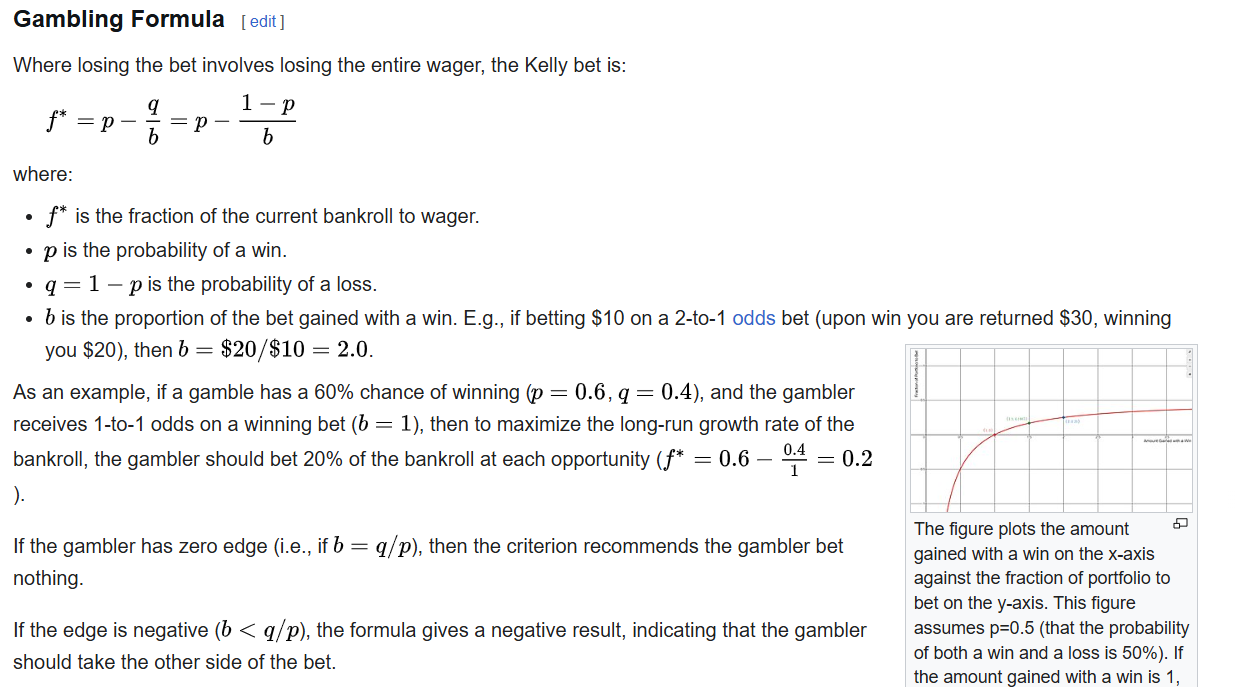

polymarket connector

In [6]:
import re
from typing import List

In [7]:
path_to_html = 'database/html_pages/NBA_2024-12-03.html'
path_to_args = 'private_kargs.json'

In [8]:
def html_parser(path_to_html) -> List:

    with open(path_to_html, 'r', encoding='utf-8') as file:
        html_content = file.read()
        pattern = r'"conditionId"\s*:\s*"([^"]+)"'
        condition_ids = list(set(re.findall(pattern, html_content)))

    return condition_ids

In [9]:
condition_ids = html_parser(path_to_html)

In [10]:
from polymarket_connector import Polymarket_connector, Market

In [11]:
client = Polymarket_connector(path_to_args=path_to_args).client

Succesfully auth with Poly


In [13]:
data_list = []

for id in condition_ids:
    try:
        market = Market(client, id, 'NBA')
    except Exception as e:
        print(e, id)
        continue
    data_list.append(
        {'question': market.question,
         'commence_time': market.game_start_time,
         'team_0': market.team_0_outcome,
         'team_1': market.team_1_outcome,
         'team_0_best_bid': float(market.team_0_best_bid.price),
         'team_0_best_ask': float(market.team_0_best_ask.price),
         'team_1_best_bid': float(market.team_1_best_bid.price),
         'team_2_best_bid': float(market.team_1_best_ask.price)
             })
    # print(market.game_start_time, 'team_0:', market.team_0_outcome, 'team_1:', market.team_1_outcome, market.team_0_best_bid.price)

2024-12-06T01:00:00Z team_0: Suns team_1: Pelicans 0.74
2024-12-05T00:30:00Z team_0: Pistons team_1: Celtics 0.13
2024-12-04T00:00:00Z team_0: 76ers team_1: Hornets 0.61
2024-12-06T00:30:00Z team_0: Thunder team_1: Raptors 0.73
2024-12-07T00:30:00Z team_0: Bucks team_1: Celtics 0.24
2024-12-08T01:00:00Z team_0: Suns team_1: Heat 0.51
2024-12-04T00:30:00Z team_0: Pacers team_1: Raptors 0.57
2024-12-07T00:00:00Z team_0: Magic team_1: 76ers 0.6
2024-12-06T00:30:00Z team_0: Hornets team_1: Knicks 0.11
PolyApiException[status_code=404, error_message={'error': 'No orderbook exists for the requested token id'}] 0x28564ce767a00dd2b2a2223bcf1b8cf4a0cddf30819cf0ecb93f70c3d0980f87
2024-12-04T00:00:00Z team_0: Wizards team_1: Cavaliers 0.07
2024-12-05T00:30:00Z team_0: Pacers team_1: Nets 0.45
2024-12-05T03:30:00Z team_0: Timberwolves team_1: Clippers 0.37
2024-12-05T00:30:00Z team_0: Lakers team_1: Heat 0.45
2024-12-07T18:00:00Z team_0: Cavaliers team_1: Hornets 0.88
2024-12-04T02:00:00Z team_0: 

In [ ]:
# float(market.yes_token_order_book.bids[-2].price) * float(market.yes_token_order_book.bids[-2].size)

In [22]:
df = pd.DataFrame(data_list)
df['commence_time'] = pd.to_datetime(df['commence_time'])
df['spread'] = df['team_0_best_ask'] - df['team_0_best_bid']
df.head(5)

,question,commence_time,team_0,team_1,team_0_best_bid,team_0_best_ask,team_1_best_bid,team_2_best_bid,spread
0,Suns vs. Pelicans,2024-12-06 01:00:00+00:00,Suns,Pelicans,0.74,0.85,0.15,0.26,0.11
1,Pistons vs. Celtics,2024-12-05 00:30:00+00:00,Pistons,Celtics,0.13,0.18,0.82,0.87,0.05
2,76ers vs. Hornets,2024-12-04 00:00:00+00:00,76ers,Hornets,0.61,0.62,0.38,0.39,0.01
3,Thunder vs. Raptors,2024-12-06 00:30:00+00:00,Thunder,Raptors,0.73,0.89,0.11,0.27,0.16
4,Bucks vs. Celtics,2024-12-07 00:30:00+00:00,Bucks,Celtics,0.24,0.34,0.66,0.76,0.10


In [28]:
for name in np.unique(df['team_0'].tolist() + df['team_1'].tolist()):
    print(name)

76ers
Bucks
Bulls
Cavaliers
Celtics
Clippers
Grizzlies
Hawks
Heat
Hornets
Jazz
Kings
Knicks
Lakers
Magic
Mavericks
Nets
Nuggets
Pacers
Pelicans
Pistons
Raptors
Rockets
Spurs
Suns
Thunder
Timberwolves
Trail Blazers
Warriors
Wizards


In [15]:
draw_df = df[df["outcome"].str.contains(" vs. ", na=False)]
map_df = pd.read_excel('database/EPL/EPL_map_table.xlsx').set_index('team_name')

In [16]:
id_dict = {}
for id, row in enumerate(draw_df.iterrows()):
    
    
    home_team = row[1].outcome.split(" vs. ")[0]
    away_team = row[1].outcome.split(" vs. ")[1]

    id_dict[home_team] = {}
    id_dict[away_team] = {}
    id_dict[row[1].outcome] = {}

    id_dict[home_team]['match_id'] = id
    id_dict[away_team]['match_id'] = id
    id_dict[row[1].outcome]['match_id'] = id

    id_dict[home_team]['team_id'] = [map_df['team_id'][home_team]]
    id_dict[away_team]['team_id'] = [map_df['team_id'][away_team]]
    id_dict[row[1].outcome]['team_id'] = np.sort([map_df['team_id'][home_team], map_df['team_id'][away_team]]).tolist()


In [17]:
team_ids = pd.DataFrame(id_dict).T
df = df.join(team_ids, on='outcome')
poly_df = df.drop(columns=['question'])

In [18]:
df = bet_api_connector.probs.reset_index()

df['Teams'] = df.groupby(['match_id'])['outcome'].transform(
    lambda outcomes: " vs. ".join(outcomes[outcomes != 'Draw'].unique()) if 'Draw' in outcomes.values else outcomes
)
df.loc[df['outcome'] == 'Draw', 'outcome'] = df['Teams']
df.drop(columns=['Teams'], inplace=True)

# Установка индекса обратно
# df.set_index(['match_id', 'commence_time', 'outcome'], inplace=True)

In [19]:
draw_df = df[df["outcome"].str.contains(" vs. ", na=False)]

In [20]:
id_dict = {}
for id, row in enumerate(draw_df.iterrows()):
    
    
    home_team = row[1].outcome.split(" vs. ")[0]
    away_team = row[1].outcome.split(" vs. ")[1]

    id_dict[home_team] = {}
    id_dict[away_team] = {}
    id_dict[row[1].outcome] = {}

    id_dict[home_team]['team_id'] = [map_df['team_id'][home_team]]
    id_dict[away_team]['team_id'] = [map_df['team_id'][away_team]]
    id_dict[row[1].outcome]['team_id'] = np.sort([map_df['team_id'][home_team], map_df['team_id'][away_team]]).tolist()

In [21]:
team_ids = pd.DataFrame(id_dict).T
team_ids = team_ids.drop_duplicates()
bet_api_df = df.join(team_ids, on='outcome')
bet_api_df['team_id'] = bet_api_df['team_id'].map(lambda x: str(x))
poly_df['team_id'] = poly_df['team_id'].map(lambda x: str(x))

In [22]:
merged_df = pd.merge(poly_df, bet_api_df, on=['commence_time', 'team_id'], how='left')
merged_df = merged_df.sort_values(by='match_id_y')
merged_df.set_index(['match_id_y', 'commence_time', 'outcome_y'], inplace=True)
merged_df = merged_df.drop(columns=['outcome_x', 'no_best_bid', 'no_best_ask', 'match_id_x', 'team_id'])
merged_df['yes_best_ask'] = merged_df['yes_best_ask'].map(lambda x: float(x))
merged_df['yes_best_bid'] = merged_df['yes_best_bid'].map(lambda x: float(x))

In [23]:
merged_df[merged_df['yes_best_bid'] < merged_df['min']]

yes_best_bid  \
match_id_y                       commence_time             outcome_y                                             
35a970f1185447b6ecb34579e3a9081f 2024-12-04 19:30:00+00:00 Southampton                                    0.10   
                                                           Chelsea vs. Southampton                        0.15   
7a49bf6a3b8487bfb5941dc6f3554219 2024-12-04 20:15:00+00:00 Arsenal vs. Manchester United                  0.19   
                                                           Manchester United                              0.12   
882cefd62d702d18942a27b8bdabe217 2024-12-03 20:15:00+00:00 Leicester City                                 0.32   
c5f90c628d39b81cb2d9193f33986e94 2024-12-04 19:30:00+00:00 Manchester City vs. Nottingham Forest          0.16   
                                                           Nottingham Forest                              0.09   
cf50e11019bafbf2b5f32da174a2a4f5 2024-12-04 19:30:00+00:00 Wolverhampton Wanderers                        0.25   
d8a41f415b6d80b1639e4d7d3c9fd0cd 2024-12-04 19:30:00+00:00 Newcastle United                               0.21   
dd4e15590abf2809327c5847ac48224a 2024-12-04 20:15:00+00:00 Brentford                                      0.21   
                                                           Aston Villa vs. Brentford                      0.23   

                                                                                                  yes_best_ask  \
match_id_y                       commence_time             outcome_y                                             
35a970f1185447b6ecb34579e3a9081f 2024-12-04 19:30:00+00:00 Southampton                                    0.11   
                                                           Chelsea vs. Southampton                        0.17   
7a49bf6a3b8487bfb5941dc6f3554219 2024-12-04 20:15:00+00:00 Arsenal vs. Manchester United                  0.20   
                                                           Manchester United                              0.14   
882cefd62d702d18942a27b8bdabe217 2024-12-03 20:15:00+00:00 Leicester City                                 0.34   
c5f90c628d39b81cb2d9193f33986e94 2024-12-04 19:30:00+00:00 Manchester City vs. Nottingham Forest          0.18   
                                                           Nottingham Forest                              0.12   
cf50e11019bafbf2b5f32da174a2a4f5 2024-12-04 19:30:00+00:00 Wolverhampton Wanderers                        0.28   
d8a41f415b6d80b1639e4d7d3c9fd0cd 2024-12-04 19:30:00+00:00 Newcastle United                               0.23   
dd4e15590abf2809327c5847ac48224a 2024-12-04 20:15:00+00:00 Brentford                                      0.23   
                                                           Aston Villa vs. Brentford                      0.25   

                                                                                                      mean  \
match_id_y                       commence_time             outcome_y                                         
35a970f1185447b6ecb34579e3a9081f 2024-12-04 19:30:00+00:00 Southampton                            0.111341   
                                                           Chelsea vs. Southampton                0.167572   
7a49bf6a3b8487bfb5941dc6f3554219 2024-12-04 20:15:00+00:00 Arsenal vs. Manchester United          0.201711   
                                                           Manchester United                      0.134917   
882cefd62d702d18942a27b8bdabe217 2024-12-03 20:15:00+00:00 Leicester City                         0.331621   
c5f90c628d39b81cb2d9193f33986e94 2024-12-04 19:30:00+00:00 Manchester City vs. Nottingham Forest  0.183348   
                                                           Nottingham Forest                      0.111692   
cf50e11019bafbf2b5f32da174a2a4f5 2024-12-04 19:30:00+00:00 Wolverhampton Wanderers                0.271443   
d8a41f415b6d80b1639e4d7d3c9fd0cd

In [24]:
CAP = 110
merged_df['kelly'] = (merged_df['mean'] - (1 - merged_df['mean']) / (1/merged_df['yes_best_bid']-1)) * CAP

In [25]:
merged_df = merged_df[merged_df['kelly'] > 0].sort_values(by='kelly', ascending=False)

In [28]:
merged_df[merged_df['yes_best_bid'] < merged_df['min']]

yes_best_bid  \
match_id_y                       commence_time             outcome_y                                             
cf50e11019bafbf2b5f32da174a2a4f5 2024-12-04 19:30:00+00:00 Wolverhampton Wanderers                        0.25   
c5f90c628d39b81cb2d9193f33986e94 2024-12-04 19:30:00+00:00 Manchester City vs. Nottingham Forest          0.16   
                                                           Nottingham Forest                              0.09   
35a970f1185447b6ecb34579e3a9081f 2024-12-04 19:30:00+00:00 Chelsea vs. Southampton                        0.15   
882cefd62d702d18942a27b8bdabe217 2024-12-03 20:15:00+00:00 Leicester City                                 0.32   
7a49bf6a3b8487bfb5941dc6f3554219 2024-12-04 20:15:00+00:00 Manchester United                              0.12   
dd4e15590abf2809327c5847ac48224a 2024-12-04 20:15:00+00:00 Aston Villa vs. Brentford                      0.23   
                                                           Brentford                                      0.21   
7a49bf6a3b8487bfb5941dc6f3554219 2024-12-04 20:15:00+00:00 Arsenal vs. Manchester United                  0.19   
35a970f1185447b6ecb34579e3a9081f 2024-12-04 19:30:00+00:00 Southampton                                    0.10   
d8a41f415b6d80b1639e4d7d3c9fd0cd 2024-12-04 19:30:00+00:00 Newcastle United                               0.21   

                                                                                                  yes_best_ask  \
match_id_y                       commence_time             outcome_y                                             
cf50e11019bafbf2b5f32da174a2a4f5 2024-12-04 19:30:00+00:00 Wolverhampton Wanderers                        0.28   
c5f90c628d39b81cb2d9193f33986e94 2024-12-04 19:30:00+00:00 Manchester City vs. Nottingham Forest          0.18   
                                                           Nottingham Forest                              0.12   
35a970f1185447b6ecb34579e3a9081f 2024-12-04 19:30:00+00:00 Chelsea vs. Southampton                        0.17   
882cefd62d702d18942a27b8bdabe217 2024-12-03 20:15:00+00:00 Leicester City                                 0.34   
7a49bf6a3b8487bfb5941dc6f3554219 2024-12-04 20:15:00+00:00 Manchester United                              0.14   
dd4e15590abf2809327c5847ac48224a 2024-12-04 20:15:00+00:00 Aston Villa vs. Brentford                      0.25   
                                                           Brentford                                      0.23   
7a49bf6a3b8487bfb5941dc6f3554219 2024-12-04 20:15:00+00:00 Arsenal vs. Manchester United                  0.20   
35a970f1185447b6ecb34579e3a9081f 2024-12-04 19:30:00+00:00 Southampton                                    0.11   
d8a41f415b6d80b1639e4d7d3c9fd0cd 2024-12-04 19:30:00+00:00 Newcastle United                               0.23   

                                                                                                      mean  \
match_id_y                       commence_time             outcome_y                                         
cf50e11019bafbf2b5f32da174a2a4f5 2024-12-04 19:30:00+00:00 Wolverhampton Wanderers                0.271443   
c5f90c628d39b81cb2d9193f33986e94 2024-12-04 19:30:00+00:00 Manchester City vs. Nottingham Forest  0.183348   
                                                           Nottingham Forest                      0.111692   
35a970f1185447b6ecb34579e3a9081f 2024-12-04 19:30:00+00:00 Chelsea vs. Southampton                0.167572   
882cefd62d702d18942a27b8bdabe217 2024-12-03 20:15:00+00:00 Leicester City                         0.331621   
7a49bf6a3b8487bfb5941dc6f3554219 2024-12-04 20:15:00+00:00 Manchester United                      0.134917   
dd4e15590abf2809327c5847ac48224a 2024-12-04 20:15:00+00:00 Aston Villa vs. Brentford              0.243043   
                                                           Brentford                              0.222870   
7a49bf6a3b8487bfb5941dc6f3554219